## 5. 지도학습: 회귀

### [0] 들어가기 전 개념 정리 



#### 0. Mechine Learning 정의 


- 머신러닝 학습 방법에 따라서 '지도 학습 / 비지도 학습 / 강화 학습'

#### 1. 지도 학습(Supervised Learning): 정답 Data(Label)이 존재
- Model(Alrorithm) 주입하는 훈련 데이터에 <span style = 'color:red'>Label</span>이 존재하는 학습 방식
- 입력 값(X) 대응되는 Label(Y)을 활용해 입력 값과 Label 사이의 관계

    #### 1-1 분류(Classification) 
    - 주어진 데이터(feature)를 정해진 Category(label, Class)를 분류하는 문제 -> X에 대하여  <span style = 'color:red'> 이산형 변수</span> Y를 예측
    - 분류할 Category(Label)에 따라 '이진 분류' 혹은 '다중 분류'로 나뉨
    - 대표적인 알고리즘: K-NN, Navie Bayes, Supoort vector, Machine Decesion 등
    - 예시 문제: '대출 연제 탐지 여부' ("연체할 것이다 vs 아니다"라는 이진 분류)

  #### 1-2 회귀(Regression)
    - 주어진 데이터(Feature)를 통해 연속된 값을 예측하는 문제 -> X에 대하여  <span style = 'color:red'> 연속형 변수</span> Y를 예측
    - 대표적인 알고리즘: Linear Regression, Ridge, Lasso 등
    - 예시 문제: '서울 아파트 집값 예측'(서울 아파트 집값이 얼마 일것이다)
  
-----
#### 2. 비지도 학습(Unsupervised learning): 정답 Data(Label) 존재하지 않음 

- 명확한 정답(Y) 없이 데이터(X)의  <span style = 'color:red'> 관계, 패턴, 형태</span>를 찾아야하는 학습 방식 
  
    #### 2-1 군집(Clustring)     
    -  데이터 특성을 고려해, 데이터 집단(Clustring)을 정의하고, 데이터 집단의 대표할 수 있는 중심점을 찾아서, 비슷한 특성을 가진 데이터들을 Gropuping하는 알고리즘
    - 거리 (Distance Metrix)를 기반으로 Grouping
    - 대표적인 알고리즘: K-means, DESCAN
    
    #### 2-2 차원 축소(Dimensionality Reduction)
    - 높은 차원의 데이터를 낮은 차원으로 줄여 특성을 살펴보는 기법(ML의 경우 Feature 축소 혹은 추출 과정에 사용됨
    - 대표적인 알고리즘: PCA
    
    #### 2-3 Association Rule learning
    - 데이터의 Attribute(속성) 간의 연관성을 발견하는 알고리즘(특정 사건 시 함께 자주 발생하는 다른 사건의 조건부 확률의 규칙)
    - 유사도를 측정하는 방법 중 하나면서, 방향성이 존재함
    - Support(지지도, 특정 품목 집합이 자주 등장하는 빈도 / 거래 비율 / 방향성이 없음)
    - Cofidnece(신뢰도, 특정 상품이 존재할 때, 다른 상품이 나타나틑 빈도 / 방향성이 있음)
----
#### 3. 준지도 학습
- Algorithm의 일부만 Label이 있는 데이터 (지도 학습 + 비지도 학습 조합)
- 구글 포트 호스팅 서비스
 -> 서비스에 가족사진을 올리면 특정 사람이 등장하는 사진을 자동으로 인식(군집 / 비지도 학습)   
 -> 여기에 사람마다 "인적정보(Label)"를 추가하면 사진마다 이름 등의 인적정보를 알 수 있고 사진을 쉽게 찾을 수 있음

----
#### 4. 강화 학습(Reinforcement Learning)
- 'Agent(학습 시스템)'이 수 많은 실험(Simulation)을 통해 현재 상태(state)에서 어떤 행동(Action)을 취해야 미래의 보상(Reward) 혹은 벌점(Penlality)를 최소화하는 지에 대해 학습하는 알고리즘
- '현재 상태(state) - 행동(Action) - 보상(Reward) - 다음 상태(Next state)' 의 데이터가 존재해야 함
- 대표적인 예: Deepmind의 Alphago 프로그램


----- 
### [1] 이번 단원 정리(목표)

(1) 머신러닝 中 선형 회귀 모델에 대한 이해(1차원 ~ 고차원)  
(2) 모델을 훈련과정에서 학습에 최적화된 모델 파라미터(비용함수 혹은 오차함수를 최소화하는 모델 파라미터)를 계산[Gradient Descent]  
(3) 훈련 과정에서 발생하는 과대적합(Overfitting)의 개념과 일반화된 모델 선택 방법(K-Fold)
 


## 5.1 1차원 입력 직선모델 

## 5.1.1 직선 모델  

- 수식: $$ y(x) =  \hat{y} = w_{0} x + w_{1} $$ 

$\Rightarrow$ 모델 파라미터($w_{i}$): $w_{0}$는 직선의 기울기  $w_{1}$는 직선의 절편 / 모델의 파라미터를 조정해 다양한 직선 방정식 생성  
  
$\Rightarrow$ $x$(input data): 입력 변수,   $y(T)$: 타겟(ouput) 변수,  $\hat{y}$: x에 대한 예측치  
  
$\Rightarrow$ 나이(Input data, x)를 통해 키(Target data, y)를 예측하는 문제


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# [1] 데이터 생성 
np.random.seed(seed=1) # 난수를 고정

# 1-1. 입력 변수(X) 생성: 나이 -------------
X_min, X_max = 4,30    # 정의할 X 값 범위 표시: x의 하한값(최소값) 및 상한값(최대값) 
X_n = 16 
X = 5 + 25 * np.random.rand(X_n)

# 1-2. 목표 변수(t) 생성: 키  ----------------
Prm_c = [170, 108, 0.2] # 매개 변수
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 * np.random.randn(X_n) # 16개의 target vector(tall) 생성
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T) # data 저장(npz 형태)


# [2] 데이터 확인
print('생셩된 input vector(age): \n', X)
print('\n생셩된 연령 분포: \n', np.round(X, 2))  # 연령대를 소수점 2번째 자리 표현
print('\n생셩된 키 분포: \n', np.round(T, 2))    # "키"도 위와 상동

생셩된 input vector(age): 
 [15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]

생셩된 연령 분포: 
 [15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]

생셩된 키 분포: 
 [170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


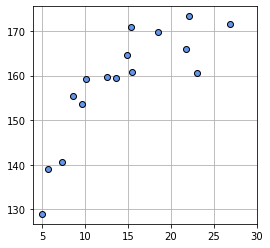

In [2]:
#  [3] 데이터 시각화(키-나이 상관정도)
plt.figure(figsize=(4, 4))
plt.plot(X, T, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')  # linestyle = 'None'(plot 선을 제거)
plt.xlim(X_min, X_max)    # plot x 범위
plt.grid(True)
plt.show()

## 5.1.2 제곱 오차 함수

### [0] 머신러닝의 (학습) 목적
- 주어진 데이터를 통해서 설명 변수(x)와 반응변수(y) 사이의 관계를 설명하는 함수 $f(함수: 파라미터)$를 만드는 것
- 데이터(input data)에 대한 모형의 결과(output)가 정답(Label)에 가깝게 나오게 학습하는 것(데이터에 가장 잘 맞는 파라미터)

$\Rightarrow$ '모델의 성능'을 측정하는 측정 지표와 비용함수(손실 함수)가 존재 


###  [1]  손실함수 / 측정 지표
[0] 모델의 파라미터(ex: $w_{0}, w_{1}$)를 결정   
[1] 각 입력 데이터($x_{n}$) 에서의 예측값($\hat{y}$, 주어진 직선의 식에 입력값 $x_{n}$를 대입한 값, 직선위의 점) 생성   
[2] 모든 데이터 점의 오차를 구한 뒤 측정지표에 맞게 계산(손실함수)


###  [2] 회귀 측정 지표 

#### 1. MSE(Mean Squared Error, 평균 제곱 오차)
$$ {\sum_{k=1}^N  (y-\hat{y})^2 \over N} $$
- 모델의 예측값($ \hat{y} $)과 실제값($ y $) 차이를 제곱하여 평균한 것 / 면적의 합
- 특이치에 민감함 -> MSE의 경우 오차를 제곱하기 때문에 이상치의 경우 오차의 값이 상대적으로 더 크게 작용

![MSE_geometry](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FmloHf%2FbtqEK8dvqmA%2F4oQTxoxXyBKDwmgNych7r1%2Fimg.jpg)

#### 2. MAE(Mean Absolute Error, 평균 절대 오차)
$$ {\sum_{k=1}^N \left| y-\hat{y} \right| \over N} $$
- 모델의 예측값($ \hat{y} $)과 실제값($ y $) 차이를 절대값으로 변환해 평균한 것 
- 절대값을 취하기 때문에 직관적인 지표(해석이 용이함) 
- MSE보다 특이치(이상치)에 대해서 Robust
- 절대값을 취하기 때문에 모델이 underformace(모델이 실제보다 낮은 값으로 예측) or overperformance(모델이 실제보다 높은 값으로 예측) 알 수 없음
- 예측값의 Vector와 Target값의 Vector 사이의 거리를 재는 방법 $\Rightarrow$ $ \ell_{1} $ norm(Manhattan norm)  

![MAE_geometry](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcvHqwi%2FbtqEIoCxgVp%2FqjpU4d9X7qGlEIubYbllNK%2Fimg.jpg)

#### 3. RMSE(Root Mean Squared, 평균 제곱근 오차)
$$ \sqrt {\sum_{k=1}^N  (y-\hat{y})^2 \over N} $$
- MSE를 Root 씌운 것 -> 오류의 제곱을 구할 때 실제 오류 평균보다 더 커지는 특성이 있어서 Root를 씌움
- 예측값의 Vector와 Target값의 Vector 사이의 거리를 재는 방법 $\Rightarrow$ $ \ell_{2} $ norm(Euclidean norm)

#### 4. MAPE(Mean Absolute Percentage Error, 평균 절대 백분율 오차)  
$$ {\sum_{k=1}^N \left| y-\hat{y} \over y \right| \over N}  * 100 % $$  
- MAE를 Percentage(백분율)로 변환한 것 / MAE와 마찬가지로 MSE로 특이치에 Robust
- 다른 통계량보다 상대적으로 쉽게 이해할 수 있음 [예: MAPE값이 5이면 -> 예측 값은 평균 5% 벗어난다.]
- 모형이 데이터를 잘 적합시켜도 MAPE 값이 클 수 있음(0 근처의 값 많을 경우): 절대 오차를 실제 데이터로 나누기 때문에 0의 가까운 값이 있으면 비정상적으로 팽창 가능

![MAPE](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcleMLL%2FbtqEJBVgew3%2FpectKphKhJnKmpr0r0tIg1%2Fimg.jpg)

#### 5. RMLSE(Root Mean Square Logarithmicc Error,  평균 제곱근 로그 오차)
$$ \sqrt {\sum_{k=1}^N (\log(\hat{y} + 1) - \log(y + 1))^2 \over N} $$  
- RMSE에 Log를 취한 것 
- Outlier에 Robust함 / RMSLE는 Outlier가 있더라도 값의 변동 폭이 크지 않음(log의 효과)
- 상대적 Error를 측정 
- Under Estimation(예측값이 실제값보다 작을 때) Penalty 부여

$\Rightarrow $$ ((\hat{y} + 1) \over (y + 1))) ^2 $ (예측값이 실제값보다 작으면 -> log 내부의 값은 0에 가까워짐)

#### 6. R2 Score(결정 계수)
$$ R^2 = 1 - {SSE \over SST}$$ (SST: 잔차 제곱의 합 / SSE 제곱 오차항! )

- 선형 회귀 모델의 적합도 측정값(데이터에 대해서 해당 모델이 얼마나 연관성이 가지고 있는지 판단 가능)  
- 0과 1사이의 값을 가지며, 1에 가까울수록 높은 연관성
- RMSE, MAE는 데이터의 scale에 따라서 값이 크게 변하기 때문에 해당 성능 지표의 값만 가지고 판단하기 어렵지만, 결정 계수의 경우는 상대적인 성능이기 대문에 직관적으로 판단할 수 있음

![SSE](https://image.slidesharecdn.com/linearregression-140903114216-phpapp01/95/linear-regression-22-638.jpg?cb=1409744639)

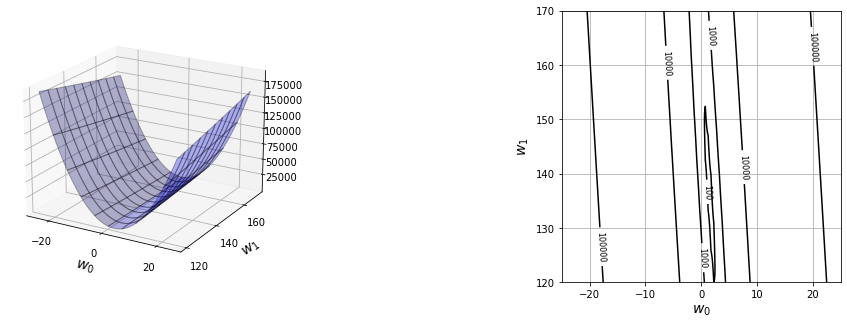

In [3]:
from mpl_toolkits.mplot3d import Axes3D

# 평균 오차 함수 정의(w: 가중치 벡터)
def mse_line(x, t, w): 
    y = w[0] * x + w[1]       # 직선 모델의 출력값(예측값)
    mse = np.mean((y - t)**2) # MSE((예측값 - 실제값)의 제곱 평균)
    return mse

## 변수정의 
xn = 100                                       # 등고선 표시 해상도
w0_range = [-25, 25]                           # 가중치 W0의 범위
w1_range = [120, 170]                          # 가중치 W1의 범위
x0 = np.linspace(w0_range[0], w0_range[1], xn) # 변수 x0 생성
x1 = np.linspace(w1_range[0], w1_range[1], xn) # 변수 x1 생성
xx0, xx1 = np.meshgrid(x0, x1)                 # 3차원 시각화를 위한 격자 생성(등고선 표시 해상도 만큼)
J = np.zeros((len(x0), len(x1)))               # w에 대응하는 평균제곱오차 J를 정의 

## J에 w0와 w1 변화에 따른 대응 값 저장(행: w0 변화, 열: w1 변화)
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

## 시각화
plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=1.0)  # 두 plot 사이의 간격

# 시각화 [1] (3차원 plot) 가중치(w0, w1)에 변화에 따른 오차(j)의 변화 plot
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black') # 3차원 plot(plot 선 stride = 10)
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)           # 3차원 시각화의 각도 
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)

# 시각화 [2] (3차원 plot) 가중치(w0, w1)에 변화에 따른 오차(j)의 변화 등고선
plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors='black', levels=[100, 1000, 10000, 100000])  # 최솟값은 등고선 100부근에서 결정
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.show()

[평균 제곱 오차와 1차 함수의 매개 변수의 관계]

1. $w_{0}$ 방향의 변화(기울기 변화)가 Loss function(MSE)의 큰 변화   
$\Rightarrow$ (좌, 우 plot의 $w_{0}$ 축 기준으로 변화할 경우 등고선의 값 / 3차원 plot의 계곡의 바닥 변화 정도가 심함)

--- 
2. $w_{1}$ 방향의 변화(편향 변화)가 Loss function(MSE)의 변화는 상대적으로 미비   
$\Rightarrow$ (좌, 우 plot의 $w_{1}$ 축 기준으로 변화할 경우 등고선의 값 / 3차원 plot의 계곡의 바닥 변화 정도가 거의 없음)

## 5.1.3 경사하강법(Gradient descent)

[복습] 
1. 4.5.2 편미분: 각각의 방향에 대한 기울기 / $f를 w 변수들에 대한 편미분 -> 기울기 벡터(Gradient)$
2. (반복) 모델 학습의 목표 -> 데이터에 잘 맞는(손실함수가 최소 / 성능 지표 최적화) 파라미터 ($w_{0}, w_{1}$)를 찾는 것 

### <p style = "font-size: 20px"> <기본 Idea>  손실 함수를 최소화 하기 위해서 반복해서 파라미터를 조정하자!</p>
      
$\Rightarrow$ (산속에서 잃어버렸을 때, 골짜기를 내려가는 좋은 방법: 가파른 길을 따라 내겨라는 것)

[1] 파라미터를 임의의 값으로 결정(무작위 초기화, Random initalization)  
[2] 손실함수가 감소되는 방향으로 파라미터를 수정  
[3] [1] ~ [2]를 여러번 반복(손실함수가 최솟값에 수렴할 때)하여 최적의 파라미터를 찾음 


![gd_example](https://t1.daumcdn.net/cfile/tistory/9916994E5BFA9D6D1C)

### [1] 파라미터 갱신 방법: $f^\prime$ 부호 반대 방향

![parameter-updata](https://mblogthumb-phinf.pstatic.net/MjAyMDAzMTZfMTQ2/MDAxNTg0MzAxMTIxNTE1.MSfJ4ch9dy_oRPgmvgAEzRtB-E12P-cf20QLXeIVwo4g.MvGGYWMDQQUbQ9-VzmT3jTZTXoNBlW4PLM5-TOimmy8g.PNG.jevida/031520_1938_Gradient1.png?type=w800)

    [1] 행렬 표기   
$$ W(t + 1) = W(t) - \alpha  \triangledown_{w} f | w(t) $$ 

    [2] 성분 표기(1차원 직선 기준)
    
$$ W_{0}(t + 1) = W_{0}(t) - \alpha {\partial f \over \partial w_{0}}| w_{0}(t), w_{1}(t) $$ 
$$ W_{1}(t + 1) = W_{1}(t) - \alpha {\partial f \over \partial w_{1}}| w_{0}(t), w_{1}(t) $$
    
    [3] 설명
- 기울기  $ - \triangledown_{w} J = - \begin{bmatrix} {\partial f \over \partial w_{0}}  & {\partial f \over \partial w_{1}} \end{bmatrix}^T $

$\Rightarrow$  손실함수 J를 $w_{0}$와 $w_{1}$로 편미분한 벡터) J의 기울기   
$\Rightarrow$  $w$의 함수로 $w(t)$는 t 시점의 기울기 
    
- 학습률: $ \alpha$
$\Rightarrow$ 갱신(Updata) 폭을 조절 / 양수 값

![alpha_important](https://mblogthumb-phinf.pstatic.net/MjAyMDAzMTZfODcg/MDAxNTg0MzAxMTIzNzkx.30RyWOQ5ZR-Z2uJbeVJnHe-22HPsc6ap6tSpYJL0m1wg.dPzbux16yI1QpvQKyJztLVNGH87nIybM8A8-h5ITwHsg.PNG.jevida/031520_1938_Gradient3.png?type=w800)

- 학습률이 너무 크면: Updata 잘 이루어짐(Local Minimum에서 벗어남) / 수렴하기 어려움(더 큰 값으로 발산해 적절한 해를 구하기 어려움)
- 학습률이 너무 작으면: 시간이 오래 걸리며, Local Minimum에서 빠짐

![local_global_minimum](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQY8e4tvMBMpSzMV3lQxyjSJ2jI0_yi5raFqQ&usqp=CAU)

-> Local Minimum(지역 최솟점: 극소값 / 전체 최소값은 아님) 
-> Global Minimum(전역 최솟점: 전체 최소값)

### [2] 선형 회귀 1차원 모델 적용

- MSE Cost function(볼록 함수 / convet function): 지역 최소값은 없고, 전역 최솟값 하나가 있음 / 연속된 함수 -> 전역 최솟값에 접근 보장
- 추가적인 내용 정리: 손실함수 -> 미분한 결과인데 기본적으로 위에서 정의한 손실함수 MSE의 경우 -> 2차 함수로 편미분할 경우 0으로 자동 수렴(볼록함수) / 하지만 paramter가 많아 질수록 각각 편미분한 값을 0으로 찾는 것은 어려운 문제(MLP)
- 적용  
모델(방정식): $y(x) = w_{0} x + w_{1}$  
손실함수(J): $J = {1 \over N} \sum_{k=0}^{N-1} (y_{n} - t_{n})^2 = {1 \over N} \sum_{k=0}^{N-1} (w_{0} x_{n} + w_{1} - t_{n})^2 $
 
<br>
- 복습  

[1] 다변수 함수의 편미분 연쇄 법칙: $𝑤_{i}$ 에 대해 편미분을 진행하면 $𝑤_{i}$가 있는 각각의 함수를 연쇄법칙을 적용하여 값을 구한 뒤 더해줌

$$  {\partial f(g_0(w_0, w_1),g_1(w_0, w_1)) \over \partial w_0} = 
{df \over dg_0} {dg_0 \over dw_0} + {df \over dg_1} {dg_1 \over dw_0} $$ 


[2] 미분과 합의 기호 교환:  (합 계산 후 미분 -> 각 항별로 미분 후 더함)
$$ 
{\partial \over \partial w} \sum_{n} {f_n(w)}
= \sum_{n} {\partial \over \partial w} {f_n(w)}
$$ 

- 1차원 직선 회귀 모델, MSE의 편미분
$$ {\partial f \over \partial w_{0}} = {2 \over N} \sum_{k=0}^{N-1} (w_{0} x_{n} + w_{1} - t_{n})x_{n}$$
$$ {\partial f \over \partial w_{1}} =  {2 \over N} \sum_{k=0}^{N-1} (w_{0} x_{n} + w_{1} - t_{n}) $$

- 1차원 직선 회귀 모델, 파라미터 Updata 
$$ W_{0}(t + 1) = W_{0}(t) - \alpha {2 \over N} \sum_{k=0}^{N-1} (w_{0} x_{n} + w_{1} - t_{n})x_{n}$$ 
$$ W_{0}(t + 1) = W_{0}(t) - \alpha {2 \over N} \sum_{k=0}^{N-1} (w_{0} x_{n} + w_{1} - t_{n}) $$ 

In [4]:
## MSE(평균 제공 오차)의 도함수(기울기)
def dmse_line(x, t, w):
    y = w[0] * x + w[1]              # 모델(직선 방정식)
    d_w0 = 2 * np.mean((y - t) * x)  # w0의 도함수(기울기)
    d_w1 = 2 * np.mean(y - t)        # w1의 도함수(기울기)
    return d_w0, d_w1

## 예시 
d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

[5046.3  301.8]


반복 횟수 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


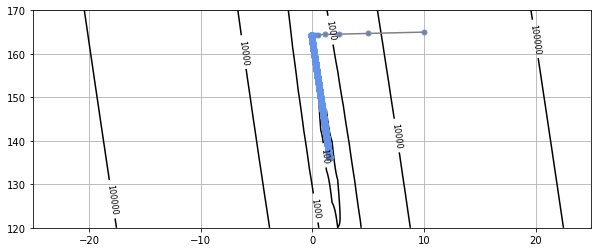

In [5]:
# MSE를 최소화하는 w를 구하는 함수
def fit_line_num(x, t):
    w_init = [10.0, 165.0] # 매개 변수의 초기값
    alpha = 0.001          # 학습률(갱신 폭)
    i_max = 100000         # 반복 최대 횟수
    eps = 0.1              # 반복을 종료 도함수의 절대 값의 한계
    w_i = np.zeros([i_max, 2]) # w0, w1를 저장할 변수 생성
    w_i[0, :] = w_init         # 초기 매개변수 저장
    
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i - 1])           # 현 시점(T)에서의 MSE의 기울기 계산
        w_i[i, 0] = w_i[i - 1, 0] - alpha * dmse[0]  # w0를 갱신
        w_i[i, 1] = w_i[i - 1, 1] - alpha * dmse[1]  # w1를 갱신
        if max(np.absolute(dmse)) < eps:             # 종료판정, np.absolute는 절대치
            break
            
    w0 = w_i[i, 0]           #  최적화된 mse의 매개 변수 w0값  
    w1 = w_i[i, 1]           #  최적화된 mse의 매개 변수 w1값
    w_i = w_i[:i, :] 
    return w0, w1, dmse, w_i


# 메인 plot 그리기
plt.figure(figsize=(10, 4)) # MSE의 등고선 표시
xn = 100                   # 등고선 해상도
w0_range = [-25, 25]       # 등고선 w0 범위 
w1_range = [120, 170]      # 등고선 w1 범위
x0 = np.linspace(w0_range[0], w0_range[1], xn)  # w0 값 생성
x1 = np.linspace(w1_range[0], w1_range[1], xn)  # w1 값 생성
xx0, xx1 = np.meshgrid(x0, x1)                  # grid 생성
J = np.zeros((len(x0), len(x1)))                # w에 대응하는 평균제곱오차 J를 정의 

## J에 w0와 w1 변화에 따른 대응 값 저장(행: w0 변화, 열: w1 변화)
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
        

cont = plt.contour(xx0, xx1, J, 30, colors='black', levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8) 
plt.grid(True)

# 함수 결과값
W0, W1, dMSE, W_history = fit_line_num(X, T)

# 결과 pinrt
print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
                       
# 초기 매개변수를 기준으로 최적의 MSE를 찾는 매개 변수 찾는 과정 시각화
plt.plot(W_history[:, 0], W_history[:, 1], '.-', color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()

[경사 하강법에 따른 파라미터(w)의 갱신 등고선]
- 초반부(10, 165)에서 가파르게 진행되어(1.5, 165 부근) -> 이후 천천히 나아가서 기울기가 없는 지점 도달 

w0=1.540, w1=136.176
SD=7.002 cm


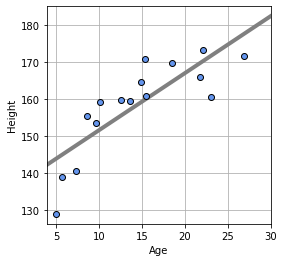

In [6]:
# (경사하강법으로) Mse를 최적하는 직선 모델 시각화 / [경사 하강법에 의해 결정된 최적의 파라미터 모델의 Fitting 결과] 
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)              
    y = w[0] * xb + w[1]                              
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)

# 
plt.figure(figsize=(4, 4))
W=np.array([W0, W1])       # 앞선 MSE를 최적화하는 매개 변수
mse = mse_line(X, T, W)    # 최적화된 MSE 값
show_line(W)               # 최적화하는 모델(직선 함수) 시각화

# 결과 print
print("w0={0:.3f}, w1={1:.3f}".format(W0, W1))
print("SD={0:.3f} cm".format(np.sqrt(mse)))

# 각 데이터 point 시각화(실제 값)
plt.plot(X, T, marker='o', linestyle='None',color='cornflowerblue', markeredgecolor='black') 
plt.xlim(X_min, X_max)
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

[경사 하강법에 의해 결정된 최적의 파라미터 모델의 Fitting 결과]  
- 직선이 적절한 곳에 위치  
- MSE: 약 49.03(오차의 제곱), 직관적이지 못함  
- MSE 제곱근(SD, 표준편차) - 직관적  
  -> 약 7cm 차이가 난다(직전과 데이터 사이의 평균적으로 7cm 정도 오차가 난다)    
  -> "오차가 정규 분포를 따른다고 가정할 경우, 전체 68% 데이터 점에서 오차가 7.0CM 이하이다" ★★★★

## 5.1.4 선형 모델 매개 변수의 해석해

### 해석해란?

[1] 해석해/해석적 방법
- (미적분 등) 수학적 기법을 사용하여 (논리적인 추론을 통해) 정확한 해를 구하는 방법  
-  수학과 -> "어느 방정식의 해가 존재한다는 것(해의 존재성와 유일성)"을 증명
-  반복 계산 없이 1회 계산으로 최적의 값을 구할 수 있음 / 계산시간이 빠르고 답도 정확함


[2] 수치해/수치적 방법(Numerical Method or Numerical Anlyis)
- 수학적 기법을 통해 정확한 해를 구하지 못하는 수학적 모델들이 현실에서는 많이 존재
- (컴퓨터를 이용해 / 시물레이션 등을 통해) 수치적인 기법을 사용하여 근사한 해를 구하는 방법
- 공학 - "방정식에 존재하는 해의 값"을 구하는게 주된 목적

### 1차원 직선(선형) 모델의 해석해와 수치해 

- 공통: 손실함수(J)가 최소화 되는 지점 찾기 


[1] 해석해 의미 - 임의의 파라미터 값(무작위 초기화)을 기준으로 -> 파라미터를 Updata 하면서 최소화되는 파라미터 값 찾기  
[2] 수치해 의미 - 손실함수를 편미분(${\partial f \over \partial w_{0}} = 0, {\partial f \over \partial w_{1}} = 0 $)하여서 0이 되는 지점을 찾기


- 해석해 수식적 표현 (방정식 -> 각각의 변수로 풀 수 있음)

$$ {\partial f \over \partial w_{0}} = {2 \over N} \sum_{k=0}^{N-1} (w_{0} x_{n} + w_{1} - t_{n})x_{n} = 0$$
$$ {\partial f \over \partial w_{1}} =  {2 \over N} \sum_{k=0}^{N-1} (w_{0} x_{n} + w_{1} - t_{n}) = 0 $$

[1] 일반화하여 표현
- 일반화 수식 

- 입력 데이터 x의 제곱 평균:        $\left\langle x^2 \right\rangle = {1 \over N} \sum_{k=0}^{N-1} (x_{n})^2$  
- 입력 데이터 x의 평균:             $\left\langle x \right\rangle = {1 \over N} \sum_{k=0}^{N-1} x_{n}$  
- 입력 데이터와 목표 데이터의 평균: $\left\langle tx \right\rangle = {1 \over N} \sum_{k=0}^{N-1} (t_{n} x_{n})$ 

----------
위의 수식적 표현을 다음과 같이 표현할 수 있음 

$$ w_{0} \left\langle x^2 \right\rangle + w_{1} \left\langle x \right\rangle - \left\langle tx \right\rangle = 0 $$
$$ w_{0} \left\langle x \right\rangle + w_{1}  - \left\langle t \right\rangle = 0 $$

[2] 합의 기호를 각 항에 전개하여 $w_{0} = 혹은  w_{1} = $ 형식으로 표현

$$ w_{0} = {\left\langle tx \right\rangle - \left\langle t \right\rangle \left\langle x \right\rangle \over \left\langle x^2 \right\rangle - \left\langle x \right\rangle^2} $$

$$ w_{1} = \left\langle t \right\rangle - {\left\langle tx \right\rangle - \left\langle t \right\rangle \left\langle x \right\rangle \over \left\langle x^2 \right\rangle - \left\langle x \right\rangle^2}\left\langle x \right\rangle  $$

수치해 w0=1.540, w1=136.176
수치해 SD=7.002 cm
-----------------
해석해 w0=1.558, w1=135.872
해석해 SD=7.001 cm


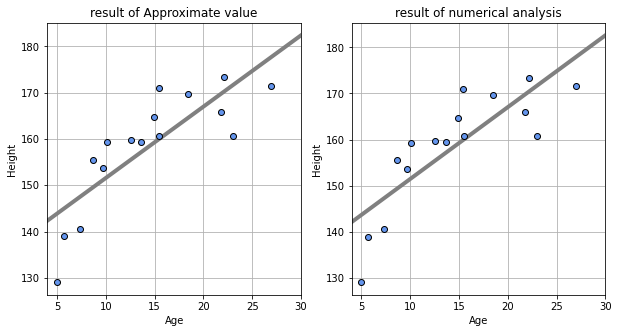

In [7]:
# 수치해 결과(경사하강법)
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)              
    y = w[0] * xb + w[1]                              
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)


#(해석해) Mse를 최적하는 매개 변수 
def fit_line(x, t): 
    mx = np.mean(x)                      # 
    mt = np.mean(t)                      #
    mtx = np.mean(t * x)                 #
    mxx = np.mean(x * x)
    w0 = (mtx - mt * mx) / (mxx - mx**2)
    w1 = mt - w0 * mx
    return np.array([w0, w1])

plt.figure(figsize=(10, 5))

# [1] 수치해 결과 표현 
plt.subplot(1, 2, 1)
W=np.array([W0, W1])       # 앞선 MSE를 최적화하는 매개 변수
mse = mse_line(X, T, W)    # 최적화된 MSE 값
show_line(W)               # 최적화하는 모델(직선 함수) 시각화

# 결과 print
print("수치해 w0={0:.3f}, w1={1:.3f}".format(W0, W1))
print("수치해 SD={0:.3f} cm".format(np.sqrt(mse)))
print("-----------------")

# 각 데이터 point 시각화(실제 값)

plt.plot(X, T, marker='o', linestyle='None',color='cornflowerblue', markeredgecolor='black') 
plt.xlim(X_min, X_max)
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('result of Approximate value')

# [2] 해석해 결과 표현
plt.subplot(1, 2, 2)
W = fit_line(X, T)           # 해석해, MSE를 최적화하는 매개 변수
mse = mse_line(X, T, W)      # 해석해, 최적화된 MSE 값 

# 결과 print
print("해석해 w0={0:.3f}, w1={1:.3f}".format(W[0], W[1]))
print("해석해 SD={0:.3f} cm".format(np.sqrt(mse)))

# (해석해) MSE를 최적하는 모델 직선 시각화
show_line(W)

plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('result of numerical analysis')
plt.show()

[1차원 직선 모델(선형 회귀 모델)의 해석해와 수치해의 차이 비교]  
- 차이가 거의 없음(손실함수의 결과) 
- But 해석해가 구해지지 않는 모델(복잡한 모델)에서 수치해가 중요 

## 5.2 2차원 입력면 모델 

- 앞선 1차원 모델을 확장한 것 
- 수식: $$ y(x) =  \hat{y} = w_{0} x_{0} + w_{1} x_{1} + w_{2} $$ 

$\Rightarrow$ 나이(Input data, $x_{0}$)와 몸무게(Input data, $x_{1}$)를 통해 키(Target data, y)를 예측하는 문제

In [8]:
np.random.seed(seed=1) 

# [1] 데이터 생성
X_n = 16                                          # 생성 난수 개수 

# 1-1. 입력 변수(X) 생성: 나이 -------------
X0 = 5 + 25 * np.random.rand(X_n)                 # 16개의 input vector(age) 생성
X0_min, X0_max = 5, 30                            # x0 범위 지정(나이)

# 1-2. 입력 변수(X) 생성: 몸무게 -------------
X1 = 23 * (T / 100)**2 + 2 * np.random.randn(X_n) # 16개의 input vector(weight) 생성
X1_min, X1_max = 40, 75                            # x1 범위 지정(몸무게)

# [2] 데이터 확인
print('생셩된 input vector(age): \n', X)
print('\n생셩된 연령 분포: \n', np.round(X0, 2))    # 연령대를 소수점 2번째 자리 표현
print('\n생셩된 몸무게 분포: \n', np.round(x1, 2))  # 몸무게를 소수점 2번째 자리 표현
print('\n생셩된 키 분포: \n', np.round(T, 2))       # "키"도 위와 상동

생셩된 input vector(age): 
 [15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]

생셩된 연령 분포: 
 [15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]

생셩된 몸무게 분포: 
 [120.   120.51 121.01 121.52 122.02 122.53 123.03 123.54 124.04 124.55
 125.05 125.56 126.06 126.57 127.07 127.58 128.08 128.59 129.09 129.6
 130.1  130.61 131.11 131.62 132.12 132.63 133.13 133.64 134.14 134.65
 135.15 135.66 136.16 136.67 137.17 137.68 138.18 138.69 139.19 139.7
 140.2  140.71 141.21 141.72 142.22 142.73 143.23 143.74 144.24 144.75
 145.25 145.76 146.26 146.77 147.27 147.78 148.28 148.79 149.29 149.8
 150.3  150.81 151.31 151.82 152.32 152.83 153.33 153.84 154.34 154.85
 155.35 155.86 156.36 156.87 157.37 157.88 158.38 158.89 159.39 159.9
 160.4  160.91 161.41 161.92 162.42 162.93 163.43 163.94 164.44 164.95
 165.45 165.96 1

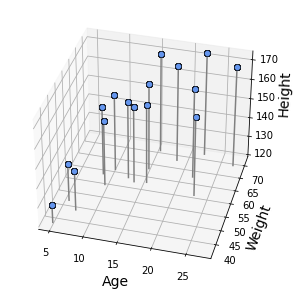

In [9]:
# 2차원 데이터의 시각화
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]], [120, t[i]], color='gray')  
        ax.plot(x0, x1, t, 'o',color='cornflowerblue', markeredgecolor='black',markersize=6, markeredgewidth=0.5) # 3차원 점 표시
        ax.view_init(elev=35, azim=-75)
        ax.set_xlabel('Age', fontsize=14)
        ax.set_ylabel('Weight', fontsize=14)
        ax.set_zlabel('Height', fontsize=14)
        
plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)

plt.show()

### 5.2.1. 데이터 표시 방법
- n: 데이터 요소 / m: 요소 번호
- 2차원 입력 데이터 표시 : $X_n = \begin{bmatrix} x_{n,0} & x_{n,1} \end{bmatrix} $
- M차원 입력 데이터 표시 : $X_n = \begin{bmatrix} x_{n,0} & x_{n,1} \cdots x_{n, M-1} \end{bmatrix} $

$\Rightarrow$ (모든 데이터를 보여주는 경우)  $X_n = \begin{bmatrix} x_{0,0} & x_{0,1} & \cdots & x_{0, M-1} \\ x_{1,0} & x_{1,1} & \cdots & x_{1 M-1} \\ \vdots & \vdots & \ddots & \vdots \\ x_{N-1,0} & x_{N-1,1} & \cdots & x_{N-1 M-1} \end{bmatrix} $

$\Rightarrow$ (차원의 관점으로 정의) $X_m = \begin{bmatrix} x_{0,m} \\ x_{1,m} \\ \vdots \\ x_{N-1, m} \end{bmatrix} $

### 5.2.2. 면 모델 
- 2차원 데이터에 대한 모델 -> 면 모델
- 좌표 ($ x = \begin{bmatrix} x_{0} & x_{1} \end{bmatrix} $)에 대해서 대응되는 y(점)을 반복하면 -> 점의 집합들이 면을 형성 

### 5.2.3. 매개 변수의 해석해(2차원 회귀)

- 1차원 모델에서의 매개변수 -> ($ x = \begin{bmatrix} x_{0} & x_{1} \end{bmatrix} $)
- 2차원 모델에서의 매개변수 -> ($ x = \begin{bmatrix} x_{0} & x_{1} & x_{2} \end{bmatrix} $) / 움직이는 면이 여러 방면

[0] 복습
- 목표: 손실함수(J)가 가장 작아지는 파라미터를 찾는 거

[1] 수치해   
-> (앞선 1차원 모델에서의) 경사하강법을 통해서 임의의 파라미터(초기 파라미터)에서부터 최적화된 파라미터를 찾음


[2] 해석해 
- $J = {1 \over N} \sum_{k=0}^{N-1} (y(x_{n}) - t_{n})^2 = {1 \over N} \sum_{k=0}^{N-1} (w_{0} x_{n, 0} + w_{1} x_{n,1} + w_{2}- t_{n})^2 $   
<br>  

- 손실함수(J)를 각각의 파라미터로 편미분한 것으로 0의 값

$$ {\partial f \over \partial w_{0}} = {2 \over N} \sum_{k=0}^{N-1} (w_{0} x_{n, 0} + w_{1} x_{n, 1} +  w_{2} - t_{n})x_{n, 0} = 
\left\{ w_{0} \left\langle x_{0}^2 \right\rangle + w_{1} \left\langle x_{0}x_{1} \right\rangle +  w_{2} \left\langle x_{0} \right\rangle   - \left\langle tx_{0} \right\rangle \right\} = 0 $$

$$ {\partial f \over \partial w_{1}} = {2 \over N} \sum_{k=0}^{N-1} (w_{0} x_{n, 0} + w_{1} x_{n, 1} +  w_{2} - t_{n})x_{n, 1} = 
\left\{ w_{0} \left\langle x_{0}x_{1} \right\rangle + w_{1} \left\langle x_{1}^2 \right\rangle +  w_{2} \left\langle x_{1} \right\rangle   - \left\langle tx_{1} \right\rangle \right\} = 0 $$

$$ {\partial f \over \partial w_{2}} = {2 \over N} \sum_{k=0}^{N-1} (w_{0} x_{n, 0} + w_{1} x_{n, 1} +  w_{2} - t_{n}) = 
\left\{ w_{0} \left\langle x_{0} \right\rangle + w_{1} \left\langle x_{1} \right\rangle +  w_{2} - \left\langle t \right\rangle \right\} = 0 $$

- 연립방정식 이후 각 변수별 정리

$$ w_{0} = {cov(t, x_{1}) cov(x_{0}, x_{1}) - var(x_{1}) cov(t, x_{0})) \over cov(x_{0}, x_{1})^2 - var(x_{0}) var(x_{1})}$$

$$ w_{1} = {cov(t, x_{0}) cov(x_{0}, x_{1}) - var(x_{0}) cov(t, x_{1})) \over cov(x_{0}, x_{1})^2 - var(x_{0}) var(x_{1})}$$

$$ w_{2} = - w_{0} \left\langle x_{0} \right\rangle - w_{1} \left\langle x_{1} \right\rangle  - \left\langle t \right\rangle  $$

w0=1.5, w1=1.0, w2=90.0
SD=13.219 cm
w0=0.4, w1=1.1, w2=89.8
SD=2.112 cm


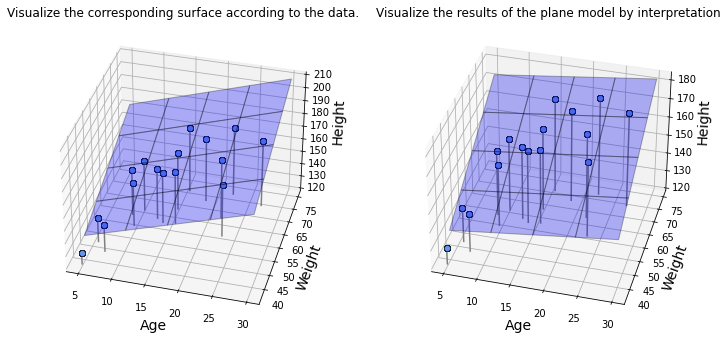

In [38]:
# 
def show_plane(ax, w, title):
    px0 = np.linspace(X0_min, X0_max, 5)  # x0 범위 안에 값 생성
    px1 = np.linspace(X1_min, X1_max, 5)  # x1 범위 안에 값 생성
    px0, px1 = np.meshgrid(px0, px1)      # 격자 생성
    y = w[0]*px0 + w[1] * px1 + w[2]      # 격자별(x0, x1별) 대응되는 y값 생성
    
    # 생성된 데이터에 대응하는 면(여러개의 점 -> 모여 면을 형성)
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3, color='blue', edgecolor='black')
    plt.title(title)
    
# 면 MSE 계산 function(2차원 데이터 -> mse 면)
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2] 
    mse = np.mean((y - t)**2)
    return mse

# 해석해 생성 / 공분산: 두변수의 평균 - 각각의 변수의 평균 곱
def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)                # t(키)와 x0(나이)의 공분산
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)                # t(키)와 x1(몸무게)의 공분산
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)             # x1(나이)와 x1(몸무게)의 공분산
    v_x0 = np.var(x0)                                                 # x0의 분산
    v_x1 = np.var(x1)                                                 # v1 분산
    w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1**2 - v_x0 * v_x1) # w0 해석해
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1**2 - v_x0 * v_x1) # w1 해석해
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)           # w2 해석해
    return np.array([w0, w1, w2]) 

## 1. 데이터에 따른 대응시킨 면 시각화
plt.figure(figsize=(12, 10))
ax = plt.subplot(1, 2, 1, projection='3d')

title_00= 'Visualize the corresponding surface according to the data.'
W = [1.5, 1, 90]

show_plane(ax, W, title_00)    # 매개변수 w(w0 = 1.5, w1 = 1, w2 = 90)일 때 데이터에 따른 면 시각화
show_data2(ax, X0, X1, T)      # 데이터 시각화
mse = mse_plane(X0, X1, T, W)  # 모델의 mse 계산
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
print("SD={0:.3f} cm".format(np.sqrt(mse)))

## 2. 해석해에 의한 평면 모델 시각화
ax_02 = plt.subplot(1, 2, 2, projection='3d')

title_01= 'Visualize the results of the plane model by interpretation'

W = fit_plane(X0, X1, T)       # x0, x1에 대응하는 t(키)의 해석해 생성
show_plane(ax_02, W, title_01) # 해석해에 의한 매개변수 w에 대한 면시각화
show_data2(ax_02, X0, X1, T)   # 데이터 시각화
mse = mse_plane(X0, X1, T, W)  # MSE 계산

print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
print("SD={0:.3f} cm".format(np.sqrt(mse)))

plt.show()

[결과 해석]
- 1차식 선형 회귀 모델의 오차 표준편차(SD): 7.00cm 
- 2차식 선형 회귀 모델의 오차 표준편차(SD): 2.55cm

-> 결론: 키를 예측할 때, 나이와 몸무게 정보가 유용한 정보이다. (예측 정확도가 높아진다)

## 5.3 D차원 선형 회귀 모델

### 5.3.1 D차원 선형 회귀 모델 

- 앞선 1, 2차원의 선형 회귀 모델을 D차원으로 확장하는 방법(일반화 방식)  
[1] 수식 (1): (절편 $w_{D}$가 포함되어 있지 않는 모델)  

$$ y(x,w) = w_{0}x_{0} + w_{1}x_{1} + \cdots + w_{D-1}x_{D-1} = \begin{bmatrix} w_{0} & \cdots & w_{D-1} \end{bmatrix}  \begin{bmatrix} x_{0} \\ \vdots \\  x_{D-1} \end{bmatrix} = w^Tx $$   

- 어떠한 (매개변수) w에 대하여, 원점을 대입하면 0이 됨(원점을 지나는 고차원의 평면)
- 그래프 상하로 평행이동하기 어려움

[2] 수식 (2): (절편 $w_{D}$가 포함되어 있는 모델)  

$$ y(x,w) = w_{0}x_{0} + w_{1}x_{1} + \cdots + w_{D-1}x_{D-1} + w_{D}  = \begin{bmatrix} w_{0} & \cdots & w_{D-1}  & w_{D} \end{bmatrix}  \begin{bmatrix} x_{0} \\ \vdots \\  x_{D-1} \\ 1 \end{bmatrix} = w^Tx $$   

### 5.3.2 D차원 선형 회귀, 매개 변수의 해석해 (관심 대상: W)

#### [기존 식]  

$$J(w) = {1 \over N} \sum_{k=0}^{N-1} (y(x_{n}) - t_{n})^2 = {1 \over N} \sum_{k=0}^{N-1} (w^Tx- t_{n})^2 $$  


#### [1]  $w_{i}$로 편미분: 해석해(각각의 편미분이 0) 
  
<br>  
$$ {\partial f \over \partial w_{j}}= {1\over N} \sum_{k=0}^{N-1} {\partial f \over \partial w_{j}} (w^Tx_{n} - t_{n})^2 = {2\over N} \sum_{k=0}^{N-1} {\partial f \over \partial w_{j}} (w^Tx_{n} - t_{n})x_{n, i}  $$   

$$ \Rightarrow  \sum_{k=0}^{N-1} (w^Tx_{n} - t_{n})x_{n, i} (i = 0, 1, \cdots, D-1) $$ 

#### [2] 편미분한 결과를 벡터와 행렬로 확장하여 문제 해결

- 편미분 결과를 i번쨰 결과를 벡터로 표현: (복습 - 벡터를 하나의 식으로 묶기)
  
$$ x_{n}^T =  \begin{bmatrix} x_{n,0} & x_{n, 1} & \cdots & x_{n,D-1} \end{bmatrix} $$  

<br>  

$$ \sum_{k=0}^{N-1} (w^Tx_{n} - t_{n}) \begin{bmatrix} x_{n,0} & x_{n, 1} & \cdots & x_{n,D-1} \end{bmatrix} = \begin{bmatrix} 0 & 0& \cdots & 0 \end{bmatrix}$$
 
$$ \Rightarrow \sum_{k=0}^{N-1} (w^Tx_{n} - t_{n})x_{n}^T = \begin{bmatrix} 0 & 0& \cdots & 0 \end{bmatrix}$$   
  
<br>  


-  행렬 형태로 변환: 행렬의 분배 법칙(복습: $ a(b+c) = ab + ac $) 
  
<br>  

$$ \sum_{k=0}^{N-1} (w^Tx_{n}x_{n}^T - t_{n}x_{n}^T) = x_{n}^T = w^T \sum_{k=0}^{N-1} x_{n}x_{n}^T - \sum_{k=0}^{N-1} t_{n}x_{n}^T$$   

$$ \therefore \mathbf w^T \mathbf x^T \mathbf x - \mathbf t^T \mathbf x =  \begin{bmatrix} 0 & 0& \cdots & 0 \end{bmatrix} $$
  
<br>  


- 참고 

$ X =  \begin{bmatrix} x_{0,0} & x_{0, 1} &  \cdots & x_{0, D-1} \\ x_{1,0} & x_{1, 1} &  \cdots & x_{1, D-1} \\
\vdots & \vdots &  \vdots & \vdots \\ x_{N-1,0} & x_{N-1, 1} &  \cdots & x_{N-1, D-1} \end{bmatrix} $
 
<br>

$ \sum_{n=0}^{N-1} (x_{n}x_{n}^T) = \sum_{n=0}^{N-1} \begin{bmatrix} x_{n,0} \\ x_{n, 1} \\ \vdots \\ x_{n,D-1} \end{bmatrix} \begin{bmatrix} x_{n,0} & x_{n, 1} & \cdots & x_{n,D-1} \end{bmatrix} = \begin{bmatrix} \sum_{k=0}^{N-1} x_{n,0}^2 & \sum_{k=0}^{N-1} x_{n,0}x_{n,1} & \cdots & \sum_{k=0}^{N-1} x_{n,0}x_{n,D-1} \\ \sum_{k=0}^{N-1} x_{n,1}x_{n,0} & \sum_{k=0}^{N-1} x_{n,1}^2 & \cdots & \sum_{k=0}^{N-1} x_{n,1}x_{n,D-1} \\  
\vdots & \vdots &  \vdots & \vdots \\
\sum_{k=0}^{N-1} x_{n,D-1}x_{n,0} & \sum_{k=0}^{N-1} x_{n,D-1}x_{n, 1} & \cdots & \sum_{k=0}^{N-1} x_{n,D-1}^2  \\ 
\end{bmatrix} ==  \mathbf x^T \mathbf x $ 

<br>


- 행렬 형태에서 'w = ' 형태 변환: 행렬 전치(복습 : $(A + B)^T = A^T + B^T $, $(AB)^T = B^TA^T $ / 역행렬)
  
<br>  

$$ (\mathbf w^T \mathbf x^T \mathbf x - \mathbf t^T \mathbf x)^T = (\mathbf x^T \mathbf x)^T (\mathbf w^T)^T - \mathbf x^T \mathbf t = 
(\mathbf x^T \mathbf x)\mathbf w = \mathbf x^T \mathbf t $$ 

$$ \therefore \mathbf w = (\mathbf x^T \mathbf x)^{-1} \mathbf x^T \mathbf t $$

<br>  
  

#### [결론]  
- x의 차원과 무관하게 최적의 w(파라미터)를 얻을 수 있음 (비용함수를 최소화하는 파라미터를 찾는 해석해적 방법)

#### (1) 정규 방정식(역행렬이 존재하는 경우)
#### (2) 유사역행렬(역행렬이 존재하지 않는 경우 -> 정방행렬이 일 경우 포함)
- 무어-펜로즈 유사 역행렬 / 특이값 분해(svd)를 이용하여 쉽게 유사 역행렬을 구함
- 특이값 분해의 이해를 돕기 위한 예시 사진

![SVD_exmample](https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2019-08-01_SVD/pic_SVD.png)

- $\sum = \begin{bmatrix} \sum_{r}  & 0_{r * (n-r)} \\ 0_{r * (m-r)} & 0_{(m-r) * (n-r)}  \end{bmatrix} $ 
  -> $ \sum_{r} $ 은 r * r 대각 행렬(대각 성분은 양의 실수, 특이값이 큰 수 ~ 작은 수로 정렬) / 나머지는 0행렬

[참고자료] https://pasus.tistory.com/31



### 5.3.3 원점을 지나지 않는 면에 대한 확장

- 원점을 지나지 않는 면으고도 확장 가능 (편향의 값을 추가해 원점에 얽매이지 않는 면으로 표현할 수 있으면 상동)

#### 참고사항 
- n 차원일 경우 정규 방정식의 경우 $ (N+1) * (N+1)$ 크기가 됨(편향 포함 / n은 특성 수)  
     <br> ->  역행렬 구하는 계산 복잡도(시간)   : $O(n^{2.4}) < time < O(n^{3})$    / 특성 수가 2배로 늘어나면 계산 시간이 5.3 ~ 8배 증가
     <br> ->  특이값 분해(SVD) 계산 복잡도(시간): $  time \fallingdotseq O(n^{2})$  / 특성 수가 2배로 늘어나면 계산 시간이 4배 증가 
     
#### [결론]
-  통계학에서 선형 회귀상에서 알지 못하는 값(parameter)를 예측하기 위한 방법론
- .경사하강법 최적화 알고리즘을 찾기 위해서 [1] 적절한 learning rate 설정 [2] 많은 연산량이 필요 / 한것에 비해 그와 같은 단점이 없음
-  행렬 연산을 기반으로 하기에 Feature가 많을 경우 연산이 느림(경사하강법의 경우 많은 피쳐가 존재하더라도 일정 시간 내에 해법을 찾는 것이 가능)

- 예측하고자 하는 Sample 수와 feature 수(특성 수)와 선형적으로 비례함 -> 특성이 매우 많고 훈련 샘플이 많은 경우는 시간이 오래걸림  

  ($\therefore$ 이런 경우에는 앞선 수치해 방식을 활용)

## 5.4. 선형 기저 함수 모델

[1] 선형 회귀 모델  
- 입력 변수들의 선형 결합을 바탕으로 한 모델 (선형 회귀)   
- 수식: $ y(x,w) = w_{0}x_{0} + w_{1}x_{1} + \cdots + w_{D-1}x_{D-1} + w_{D}x_{D} $  
- 데이터가 비선형이면 선형회귀 모형이 적합하지 않음

![examle](https://datascienceschool.net/_images/06.02%20%EA%B8%B0%EC%A0%80%ED%95%A8%EC%88%98%20%EB%AA%A8%ED%98%95%EA%B3%BC%20%EA%B3%BC%EC%B5%9C%EC%A0%81%ED%99%94_3_0.png)


[2] 선형 기저 함수 모델
1. 입력 변수($x$) 대신 비선형 함수($\phi(x)$)를 입력 변수로 넣은 결과값에 대한 선형 결합한 모델(비선형 함수 특징)  
2. 미리 만들어진 규칙(특정 규칙)에 의해서 자동으로 (함수의 열을) 생성 

- 수식: $ y(x,w) = w_{0}\phi_{0}(x) + w_{1}\phi_{1}(x) + \cdots + w_{D-1}\phi_{D-1}(x) + w_{D} = \sum_{j = 0}^{M} w_{j} \phi_{j}(x) = \mathbf w^T \mathbf \phi(x)  $    
    -> 매개 변수(w): 가중치 매개 변수  
    -> $w_{D}$: 더미 변수(곡선 상하로 평행 이동 조절하는 것)

![Gaussain_exmaple](https://images.velog.io/images/leeyongjoo/post/39598328-39f7-4710-b8e5-0ebf6599467e/image.png)


[3] 선형 기저 함수 모델의 해석해 

- 평균제곱오차: $$ J(w) = {1 \over N} \sum_{k=0}^{N-1} (w^T \phi(x_{n}) - t_{n} )^2 $$
   <br>  
   
    -> 이전 선형 모델의 선형 모델과 유사한 모양(데이터 벡터 $x_{n}$ -> $\phi(x_{n})$ 변환)  
    -> 입력 $\phi(x_{n})$에 대해 선형 회귀 모델 적용 / 선형 기저함수 모델은 $\phi(x_{n})$를 입력 $x_{n}$으로 해석한 선형 회귀 모델
    
   <br>  
- 해석해(정규방정식): $$ \mathbf w = (\mathbf \phi^T \mathbf \phi)^{-1} \mathbf \phi^T \mathbf t $$
    -> X를 $\phi$로 대체함

    <br>  
- 이전 복습(정규방정식): $ \mathbf w = (\mathbf x^T \mathbf x)^{-1} \mathbf x^T \mathbf t $

<br>  

#### 참고사항 정리

[1] 기저 의미  
- $R^n$의 부분공간 V의 벡터들의 집합이 일차독립이고 부분공간 V를 생성할 수 있다면, 이 집합 V에 대한 기저
- span {$w_{1}, w_{2}, \dots , w_{k}$} 에서 $ \alpha_{1} w_{1} + \alpha_{2} w_{2} + \cdots + \alpha_{k} w_{k} $이면서 span 생성하는 벡터 

[2] 기저 함수(바탕 함수)
- 함수 공간의 기저인 함수(모든 연속함수들은 기저 함수들의 선형결합으로 표시)
- (모든 Vector 공간의 함수들을 기저 벡터의 선형 결합으로 표현 가능) / 설명변수를 함수 형태로 나타내는 것

[3] after 추가적인 내용
- 기저함수를 사용하는 것은 결국 기하학적인 공간에서 좌표계의 입장을 생각하면 -> 선형 -> 비선형 혹은 비선형 -> 선형적으로 표현을 하기 위해서 바꿈
- 기저에 따라서 좌표계의 위치가 달라지기 때문

#### 추가 내용( M = 4)
- 다차원(여기서는 4차원)의 입력을 받는 선형회귀모델로 해석

[1] 전처리로 1 차원 데이터 x를 M차원의 데이터 벡터로 전환하는것
[2] M차원의 입력 x 에대해 선형회귀모델을 적용한 것

- 결국 여기서 4로 결정한 것은 기존의 입력 차원을 확장한 것으로 정의할 수 있음

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터 불러오기(최초 1차원 데이터 )
outfile = np.load('ch5_data.npz')
X = outfile['X']                                  # 나이
X_min,X_max = outfile['X_min'], outfile['X_max']  # X의 범위(min, max)
X_n = outfile['X_n']                              # 생성한 X 개수
T = outfile['T']                                  # 대응되는 Y(키)

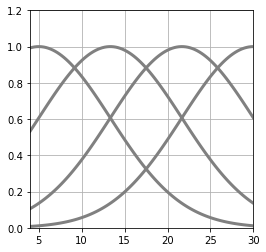

In [12]:
# 가우스 함수 정의 
def gauss(x, mu, s):
    return np.exp(-(x - mu)**2 / (2 * s**2))

# 4개의 가우스 함수 생성
M = 4
plt.figure(figsize=(4, 4))
mu = np.linspace(5, 30, M)          # 4개의 가우스 함수 중심 정의
s = mu[1] - mu[0]                   # 가우스 함수 중심 사이의 거리(분산으로 활용)
xb = np.linspace(X_min, X_max, 100) # x의 범위내를 일정한 간격으로 데이터 생성

for j in range(M):                  # 4개의 가우스 함수 y 값 생성
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray', linewidth=3)
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()

In [39]:
# 선형 기저 함수(가우스 함수)
def gauss_func(w, x):
    m = len(w) - 1                         # weight 개수
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]                      # 중심 간의 거리 
    y = np.zeros_like(x)                   # x와 같은 크기로 요소가 0의 행렬 y를 작성
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s) # y에 각각의 wegith[가중치 매개변수] * 기저 함수 
    y = y + w[m]                          # 더미 더하기
    return y

# 선형 기저 함수 MSE
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y - t)**2)
    return mse

# 선형 기저 삼후 모델의 해 
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]                   # (가우스) 기저 함수 간 중심 사이 거리(분산) 
    n = x.shape[0]                      # 데이터의 개수 
    psi = np.ones((n, m+1))             # 데이터 개수(n) * (기저 함수의 수 + 1 -> 1을 더한 이유는 편향)
    
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)  # gauss 함수를 통해서 데이터(나이)별[행], 가우스 함수(각각의 mu와 s에 대응하여) gauss로 변환
    psi_T = np.transpose(psi)           
    # 정규방정식
    b = np.linalg.inv(psi_T.dot(psi))   # (x.trnpose * x) 역행렬 
    c = b.dot(psi_T)                    # x를 골한후
    w = c.dot(t)                        # t 곱하기
    return w

def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


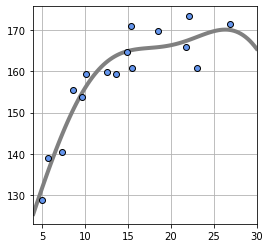

In [40]:
plt.figure(figsize=(4, 4))
M = 4                       # 선형 기저 함수의 수 = 4
W = fit_gauss_func(X, T, M) # 각각의 기저함수의 weight 계산
show_gauss_func(W)          # 선형 기저 함수 시각화

plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')  # 데이터 point 시각화
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)# mse 계산

print('W='+ str(np.round(W,1)))
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

[결과 해석]
- 1차식 선형 회귀 모델의 오차 표준편차(SD): 7.00cm 
- 2차식 선형 기저 회귀 모델의 오차 표준편차(SD): 3.98cm (1을 출력하는 더미 변수 + 4개의 가우스 기저 함수를 합한 결과)

## 5.5 Overfitting의 문제

#### [0] 들어가기 전

- (ML) 모델의 목적: 입력 데이터(Input data, x)에 대해서 새로운 데이터(일반화)를 잘 예측(모델의 결과가 정답과 가깝게) 

![fitting](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fdthql8%2FbtqCO2tkesm%2FquRxR8JpAeTG9BbtgNAahK%2Fimg.jpg)

#### [1] 과소적합(underfitting)
- 학습 데이터를 충분히 학습하지 못한 상황
- 모델이 지나치게 단순해(모델의 Capacity), 데이터의 내재된 구조를 학습하지 못한 상황 / 손실이 크게 발생, 성능이 떨어짐
- 해결방법  
가. 모델 용량(Capacity), 즉 모델의 학습 파라미터(weight, bias)의 수가 더 많은 모델을 선택
나. 모델의 제약을 줄임(규제 Hyperparameter)
다. 더 좋은 feature 제공

#### [2] 과대적합(Overfitting)
- 학습 데이터에 대해서 과하게 학습된 상황(데이터의 잡음, noise까지 학습된 상황)  
- 학습 데이터 이외의 데이터에 대해서 모델이 잘 동작하지 못함(일반화되지 못함)   
- 학습 데이터가 부족하거나 데이터의 틁성에 비해 너무 복잡한 경우 발생  
- 학습 데이터에 대한 손실을 계속 하강 / But test 데이터에 대한 loss는 감소하다가 다시 증가    
- 해결방법  
가. 모델 용량(Capacity), 즉 모델의 학습 파라미터의 수가 더 적은 모델을 선택  
나. 훈련 데이터의 특성 수를 줄이거나 모델의 제약을 가하여 단순화  
다. 훈련 데이터를 더 모으거나, 잡음을 줄임(오류 데이터 수정과 이상치를 제거하는 방향)


![fitting_grape](https://mblogthumb-phinf.pstatic.net/MjAxODA3MzBfMjMy/MDAxNTMyODkwNjUxMjY4.H_ocFIRFaG8MWrBsv8BWrTCaAMGLMKZZUh_Rd1krRLog.HAZRdDtrQMvVGKiEWfGls8bm0EhTyRKf7XzoSY1Cibsg.JPEG.qbxlvnf11/maxresdefault.jpg?type=w800)

#### [3] 과소 적합 / 과대 적합 판단 방법

##### (1) 분삭-편향 기반 탐지 
- 분산(Variance) : Dataset 내 Data가 얼마나 퍼져 있는 지 정도 
- 편향(Bias) : 데이터가 Target 떨어져 있는 정도
    -> 최적의 모델(데이터가 target 근처[편향이 적음]에 잘 모여서[분산이 적음] 분포해 있는 분포)  

![bias-variance](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FlPbM3%2FbtrbIcBSKUG%2FKBsSklrUd4YPpwCER7BQyk%2Fimg.png)

##### (2) 손실함수 기반 탐지  
- 모델 손실함수 Error와 모델의 복잡도 관계로 확인

![bias-variance2](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbTiAgV%2FbtrbACBFChH%2Fa9Mm5EIxmKkIDtyFCodS11%2Fimg.png)
  
- 과소적합 구간  
    -> Train loss,Test loss 모두 높게 나타남(학습 데이터 특성을 제대로 반영하기 어려움  
    -> 연구자 원하는 모델의 성능을 도달하기 전까지 과소 적합(모델 학습이 잘 수행하는 가정 하 Train, Validation loss 함께 감소하는 구간) 
    
    <br>  
- 과대적합 구간
    -> Train loss 꾸준히 감소하지만, (모델 복잡도 일정 수준 넘어감에 따라서) Vlidation loss가 증가하는 구간  
    -> Vlidation loss가 감소하다가 증가하는 구간
    
    <br>  
    
- 최적의 구간
    -> Vlidation loss가 감소하다가 증가하기 시작하기 직전의 point(best fit)

##### (3) 산점도 그래프 기반 구분(위의 예시 사진)

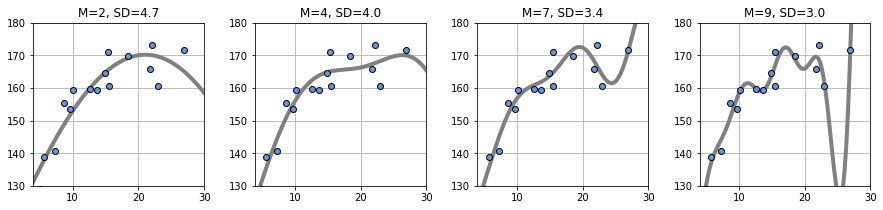

In [15]:
plt.figure(figsize=(15, 3))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]                   # 기저 함수의 수 변화 (2, 4, 7, 9)개 
for i in range(len(M)):           
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i]) # 기저 함수별 w 계산
    show_gauss_func(W)             # 시각화
    
    plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min, X_max)   
    plt.grid(True) 
    plt.ylim(130, 180)
    mse = mse_gauss_func(X, T, W)   # 기저 함수 개수별 MSE 계산
    
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

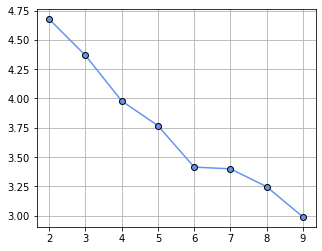

In [16]:
# 기저 함수의 개수 변화별 mse 변화
plt.figure(figsize=(5, 4))
M = range(2, 10)           # 기저 함수 개수 2 ~ 10
mse2 = np.zeros(len(M))    # 기저 함수의 변화에 따른 MSE 저장할 변수

for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])             # 각 기저 함수별(W 개수) Weight 계산
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W)) # Weight에 따른 MSE 계산
    
plt.plot(M, mse2, marker='o',color='cornflowerblue', markeredgecolor='black')
plt.grid(True)
plt.show()

#### [결과 해석]

- M(기저 함수의 개수 / 차원) 늘어나면 오차의 표준편차는 줄어듦
- 그러나 지나치게 모델 자체가 가늘고 뾰족한 모델이 됨 -> 새로운 데이터의 예측이 나빠짐(과적합)

#### [4] 모델의 일반화 

- 모델이 새로운 Sample에 대해 얼마나 잘 일반화되는지 아는 유일한 방법: 새로운 Sample에 실제로 적용(어려움)  
    -> 대안: Train데이터를 Hold out검증(Train data, Test data)
    
#### 4-1 Hold out(홀드 아웃) Validation 

[1] Data를 Train data, Test data로 나눔   
[2] Train data를 Model 훈련(Train data를 사용하여 모델의 Parameter를 최적화)  
[3] Vlidation data를 통해 성능 검증하여, 가장 높은 성능을 내는 모델을 선택
[4] Test data로 Model를 평가(Test data를 통한 오류 - 일반화 오차[외부 샘플 오차] / 오차의 추정값을 얻음)  

##### 4-2 Cross validation(교차 검증) / K-fold cross validation
- Hold out Validation의 경우, Validation set이 작을 경우 모델이 정확하게 평가되지 않을 수도 있음 
- 최대 fold 수는 N개 (데이터 1개마다 Validation set으로 검증) -> LOOCV(데이터가 적은 경우 사용)

[1] 데이터를 Train data, Test data로 나눔  
[2] Train data를 K개로 분할하여 첫번째 Fold를 Vadliation data, 나머지 K-1개 Fold를 Train data로 나눔   
[3] Train data(K-1 Fold)로 모델을 훈련(모델의 Parameter)한 이후, Validation data를 성능을 검증  
[4] 두번째 Fold를 Validation data로, 나머지 K-1개 Fold를 Train data로 나누고 동일하게 훈련 및 검증  
[5] 이러한 절차를 K회 반복하고 마지막 Test data로 Model를 평가  



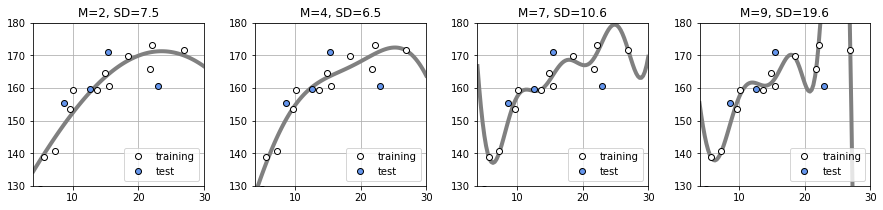

In [17]:
# Train, Test 데이터 split
X_test = X[:int(X_n / 4 + 1)]
T_test = T[:int(X_n / 4 + 1)]
X_train = X[int(X_n / 4 + 1):]
T_train = T[int(X_n / 4 + 1):]


plt.figure(figsize=(15, 3))
plt.subplots_adjust(wspace=0.3)   # 각각의 plot 간의 거리(width)
M = [2, 4, 7, 9]                  # 기저 함수 개수

for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X_train, T_train, M[i])             # Train 데이터를 가지고 weight 계산
    show_gauss_func(W)                                     # 시각화
    
    # 데이터 point 표시: Train은 흰색 / test는 파란색
    plt.plot(X_train, T_train, marker='o', linestyle='None', color='white',  markeredgecolor='black', label='training')
    plt.plot(X_test, T_test, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    
    mse = mse_gauss_func(X_test, T_test, W)                # test 데이터로 MSE 계산(앞쪽에서는 모든 데이터인데 반면)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

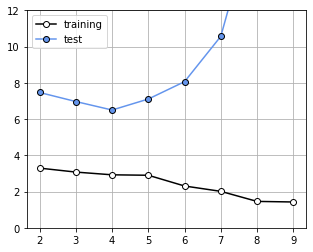

In [18]:
# 기저 함수의 개수 변화별 mse 변화(Train, test 변화 확인)
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse_train = np.zeros(len(M))     # 기저 함수의 변화에 따른 MSE 저장할 Train변수
mse_test = np.zeros(len(M))      # 기저 함수의 변화에 따른 MSE 저장할 test 변수

for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i]) 
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
    
# Train Test 각각의 기저 함수 개수에 따른 MSE 변화(Train: 지속적 하락 / Test 과적합 여부 판단 가능)
plt.plot(M, mse_train, marker='o', linestyle='-', markerfacecolor='white', markeredgecolor='black', color='black', label='training')
plt.plot(M, mse_test, marker='o', linestyle='-',color='cornflowerblue', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 12)
plt.grid(True)
plt.show()

#### [Train, Test Hold out 검증]
- M(기저 함수의 개수)이 증가함에 따라서 -> Train data의 loss는 감소 / Test data의 loss는 감소하다가 (M = 5일 때) 증가함  
    -> M >=5 의 경우: 과적합이 발생    
    -> M =4 의 경우: 최적이라 판단  

In [19]:
np.fmod(range(10),5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int32)

In [20]:
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]                               # 
    mse_train = np.zeros(k)                      # mse train list(array) 각 fold별 생성
    mse_test = np.zeros(k)                       # mse test list(array) 각 fold별 생성
    
    for i in range(0, k): # np.fmod: k로 나눈 나눗셈의 나머지(list) -> fold별로 나눠서 k-fold cross validation (k번 반복)
        x_train = x[np.fmod(range(n), k) != i]  # K-1개의 fold train(x)
        t_train = t[np.fmod(range(n), k) != i]  # K-1개의 fold train(y)
        x_test = x[np.fmod(range(n), k) == i]   # 1개의 fold validation(x)
        t_test = t[np.fmod(range(n), k) == i]   # 1개의 fold validation(y)
        wm = fit_gauss_func(x_train, t_train, m)
        mse_train[i] = mse_gauss_func(x_train, t_train, wm) # train 데이터의 mse 계산
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)    # test 데이터의 mse 계산
    return mse_train, mse_test

np.fmod(range(10),5)
M, K = 4, 4
kfold_gauss_func(X, T, M, K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782012,  18.30921743,  47.52459642]))

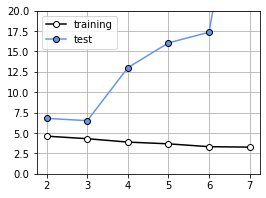

In [21]:
M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] = kfold_gauss_func(X, T, M[i], K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))


plt.figure(figsize=(4, 3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-', color='k', markerfacecolor='w', label='training')             # Train loss 변화
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-', color='cornflowerblue', markeredgecolor='black', label='test') # Test loss 변화
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

SD=4.37 cm


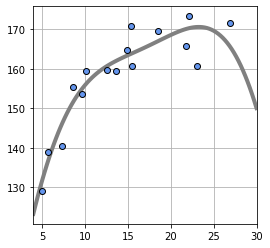

In [22]:
M = 3
plt.figure(figsize=(4, 4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

#### [K-Fold out 검증]
- M(기저 함수의 개수)이 증가함에 따라서 -> Train data의 loss는 감소 / Test data의 loss는 감소하다가 (M = 4일 때) 증가함  
    -> M =3 의 경우: 최적이라 판단   
    -> M > 4 의 경우: 최적이라 판단  
    
- fold out 검증 사용 목적(정리) -> 모델 매개 변수(w) 파악이 아니라 / 파라미터(M, 기저 함수의 개수) 결정 요소(과적합 요소 방지)
- 데이터 set의 적을 경우 유용

## 5-6. 새로운 모델 생성

- 앞선 모델의 문제점: "특정 나이대가 되면 갑자기 키가 줄어든다."는 의미  
    -> 이유: 30세 이후의 데이터가 불충분해서("키가 나이가 들면 일정한 곳에 수렴")

<br>   
- 문제에 대한 지식이 있을 경우 이처럼 문제에 맞는 모델을 추가 수정이 가능

- 이 문제에서는 x(나이)가 증가하면 곡선에 수렴하는 모델을 추가 생성  
<br>  
- 수식: $ y(x) = w_{0} - w_{1}exp(-w_{2}x)$  

    -> $ w_{0} $ : 수렴하는 값을 결정하는 변수 / $ w_{1} $ : 그래프 시작점을 결정 / $ w_{2} $ : 곡선의 기울기

In [23]:
def model_A(x, w):                      # 모델 함수 정의(w0 - w1 * exp(-w2 * x))
    y = w[0] - w[1] * np.exp(-w[2] * x)
    return y 

def show_model_A(w):                    # 
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 

def mse_model_A(w, x, t):               # 모델의 MSE(손실함수 측청)
    y = model_A(x, w) 
    mse = np.mean((y - t)**2)
    return mse

from scipy.optimize import minimize 

# (minimize => 최소값 구하는 함수, 매개 변수 초기값 주면 변수의 극소값 계산 가능)

def fit_model_A(w_init, x, t):          # 모델을 반복하여서 초기화된 Parameter
    res1 = minimize(mse_model_A, w_init, args=(x, t), method="powell") # mse_model_A : 최소값 구하는 함수 / w_init : 변수 초기값 / 
                                                                       # x: input data / t = target data
    return res1.x

#### [참고사항] powell algorithm

[1] Univariate optimization(단변수 최적화)
- x, y 축과 평행한 방향을 탐색 진행(함수 공간 N-dimensional space에서 1-dimension으로 변경[특정 변수를 고정하여]하여 단계적으로 minimum을 찾아내는 과정

[2] Powell's
- 앞선 Univariate optimization을 응용한 것   
- 각 Unit vector 의 방향과 순서대로 진행한 뒤, 최초 지점에서 현재 위치까지의 방향을 새로운 Unit vector 삼아서 진행  
- 최소화 함수를 사용할때, 늦게 수렴되거나 수렴이 보장되지 않는경우 실험적으로 사용하는 알고리즘

![power_sell](d.png)

w0=169.0, w1=113.7, w2=0.2


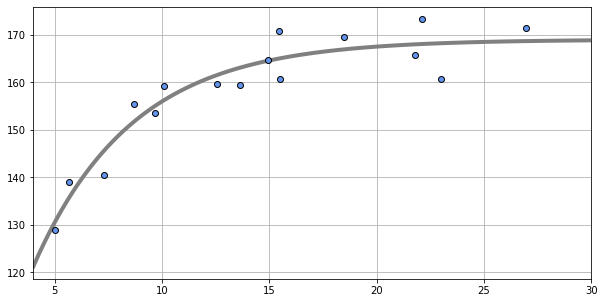

In [24]:
# w0 곡선이 수렴하는 값 결정 여부 확인 Plot
plt.figure(figsize=(10, 5))
W_init=[100, 0, 0]
W = fit_model_A(W_init, X, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

## 5-7. 모델의 선택

- 복습: (기본 idea) "미지의 데이터(test data)에 대해서 예측 정확도로 모델 성능을 평가  
  
    -> 모델 간 비교(동일한 성능 지표) / 성능이 우수한 모델을 선택

Gauss(M=3) SD=6.51 cm
Model A SD=4.72 cm


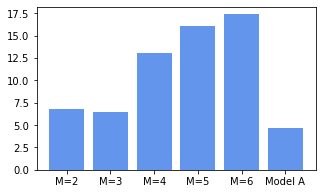

In [25]:
def kfold_model_A(x, t, k):       # k-flod 모델 정의 
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
        mse_train[i] = mse_model_A(wm, x_train, t_train)
        mse_test[i] = mse_model_A(wm, x_test, t_test)
    return mse_train, mse_test

K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)                # LOCCV(16개의 fold)로 mse (train, test 정의)
mean_A_test = np.sqrt(np.mean(Cv_A_test))                     # test 데이터 sqrt(RMSE)
print("Gauss(M=3) SD={0:.2f} cm".format(mean_Gauss_test[1]))
print("Model A SD={0:.2f} cm".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]

plt.figure(figsize=(5, 3))
plt.bar(M, SD, tick_label=label, align="center", facecolor="cornflowerblue")
plt.show()

## 5.8 정리

[1] data(입력 & 출력 변수) 존재  
[2] 미지의 입력 변수에 대한 목표(출력) 변수 예측하는 모델 생성  
[3] 목적 함수(손실 함수) / 모델의 정확도 향상 방법  
[4] 모델 후보 설정(다양한 모델, 데이터 특성을 안다면 이를 고려한 모델)  
[5] 데이터를 Train / Test data(Hold out)    
[6] Train 데이터의 모델 최적 매개 변수(parameter) 학습 후 Validation으로 결정  
[7] 최적의 매개 변수를 사용하여 Test 데이터를 기준으로 오차가 가장 적은 모델 선택   
[8] 선택된 모델들을 비교하여 최종 모델 선택

#### appendix

- Mechin learning 기본 개념: https://ebbnflow.tistory.com/165
- 회귀 모델 성능 지표: https://rk1993.tistory.com/entry/%EB%AA%A8%EB%8D%B8-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-%ED%9A%8C%EA%B7%80-%EB%AA%A8%EB%8D%B8-%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8\
- 해석해와 수치해: https://blog.naver.com/mykepzzang/220059471705 / https://ybeaning.tistory.com/31
- 유사역행렬과 정규방정식: https://pasus.tistory.com/31 
- 선형기저함수모델: https://datascienceschool.net/03%20machine%20learning/06.02%20%EA%B8%B0%EC%A0%80%ED%95%A8%EC%88%98%20%EB%AA%A8%ED%98%95%EA%B3%BC%20%EA%B3%BC%EC%B5%9C%EC%A0%81%ED%99%94.html
- 과대적합/과소적합: https://heytech.tistory.com/125
- Power shell alorithm: https://light-tree.tistory.com/178